In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1200 non-null   int64  
 1   PropertyClass            1200 non-null   int64  
 2   ZoningCategory           1200 non-null   object 
 3   RoadAccessLength         977 non-null    float64
 4   LandArea                 1200 non-null   int64  
 5   RoadType                 1200 non-null   object 
 6   ServiceLaneType          75 non-null     object 
 7   PlotShape                1200 non-null   object 
 8   LandElevation            1200 non-null   object 
 9   UtilityAccess            1200 non-null   object 
 10  PlotConfiguration        1200 non-null   object 
 11  LandSlope                1200 non-null   object 
 12  District                 1200 non-null   object 
 13  NearbyTransport1         1200 non-null   object 
 14  NearbyTransport2        

,Id,PropertyClass,ZoningCategory,RoadAccessLength,LandArea,RoadType,ServiceLaneType,PlotShape,LandElevation,UtilityAccess,...,SwimmingPoolArea,PoolQuality,BoundaryFence,ExtraFacility,ExtraFacilityValue,MonthSold,YearSold,DealType,DealCondition,HotelValue
0,775,20,RL,110.0,14226,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,395000.0
1,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000.0
2,234,20,RL,75.0,10650,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,128200.0
3,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,275000.0
4,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872.0


Duplicate Values

In [4]:
df.shape

(1200, 81)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(1200, 81)

Since the shape remains the same, there are no duplicate values.

Null Values

In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

,0
PoolQuality,1194
ExtraFacility,1154
ServiceLaneType,1125
BoundaryFence,963
FacadeType,702
LoungeQuality,560
RoadAccessLength,223
ParkingQuality,65
ParkingFinish,65
ParkingType,65


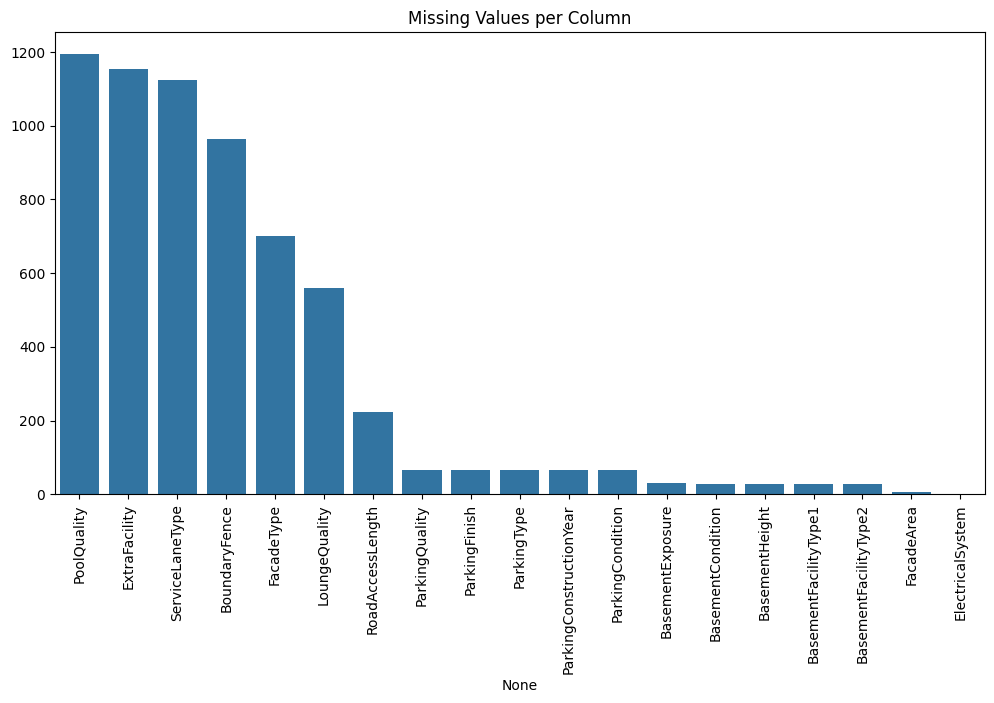

In [7]:
# plot bar graph of missing values
plt.figure(figsize=(12,6))
sns.barplot(x=missing[missing > 0].index, y=missing[missing > 0].values)
plt.xticks(rotation=90)
plt.title("Missing Values per Column")
plt.show()

In [8]:
null_value_percentages=(df.isna().sum()/df.shape[0])*100
null_value_percentages

,0
Id,0.000000
PropertyClass,0.000000
ZoningCategory,0.000000
RoadAccessLength,18.583333
LandArea,0.000000
...,...
MonthSold,0.000000
YearSold,0.000000
DealType,0.000000
DealCondition,0.000000


In [9]:
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

,0
RoadAccessLength,18.583333
ServiceLaneType,93.750000
FacadeType,58.500000
FacadeArea,0.583333
BasementHeight,2.416667
BasementCondition,2.416667
BasementExposure,2.500000
BasementFacilityType1,2.416667
BasementFacilityType2,2.416667
ElectricalSystem,0.083333


Drop the rows in the columns with less than 6% null values

In [10]:
rows_to_drop = null_value_percentages[null_value_percentages < 6].sort_values(ascending=False)
rows_to_drop

,0
ParkingConstructionYear,5.416667
ParkingQuality,5.416667
ParkingCondition,5.416667
ParkingType,5.416667
ParkingFinish,5.416667
...,...
MonthSold,0.000000
YearSold,0.000000
DealType,0.000000
DealCondition,0.000000


In [11]:
rows_to_drop = rows_to_drop.keys()
rows_to_drop

Index(['ParkingConstructionYear', 'ParkingQuality', 'ParkingCondition',
       'ParkingType', 'ParkingFinish', 'BasementExposure',
       'BasementFacilityType1', 'BasementHeight', 'BasementCondition',
       'BasementFacilityType2', 'FacadeArea', 'ElectricalSystem', 'LandSlope',
       'PlotConfiguration', 'PlotShape', 'RoadType', 'LandArea',
       'ZoningCategory', 'PropertyClass', 'Id', 'UtilityAccess',
       'LandElevation', 'ConstructionYear', 'RenovationYear',
       'NearbyTransport2', 'District', 'ExteriorCondition', 'ExteriorQuality',
       'ExteriorSecondary', 'ExteriorPrimary', 'RoofDesign', 'RoofMaterial',
       'BasementFacilitySF1', 'FoundationType', 'BasementFacilitySF2',
       'BasementUnfinishedSF', 'HeatingType', 'NearbyTransport1', 'HotelStyle',
       'OverallQuality', 'OverallCondition', 'PropertyType', 'UpperFloorArea',
       'GroundFloorArea', 'CentralAC', 'HeatingQuality', 'BasementTotalSF',
       'UsableArea', 'FullBaths', 'LowQualityArea', 'Kitchens', '

In [12]:
for row in rows_to_drop:
	print("row: ",row,"\tmissing values: \t", df[row].isna().sum())

row:  ParkingConstructionYear 	missing values: 	 65
row:  ParkingQuality 	missing values: 	 65
row:  ParkingCondition 	missing values: 	 65
row:  ParkingType 	missing values: 	 65
row:  ParkingFinish 	missing values: 	 65
row:  BasementExposure 	missing values: 	 30
row:  BasementFacilityType1 	missing values: 	 29
row:  BasementHeight 	missing values: 	 29
row:  BasementCondition 	missing values: 	 29
row:  BasementFacilityType2 	missing values: 	 29
row:  FacadeArea 	missing values: 	 7
row:  ElectricalSystem 	missing values: 	 1
row:  LandSlope 	missing values: 	 0
row:  PlotConfiguration 	missing values: 	 0
row:  PlotShape 	missing values: 	 0
row:  RoadType 	missing values: 	 0
row:  LandArea 	missing values: 	 0
row:  ZoningCategory 	missing values: 	 0
row:  PropertyClass 	missing values: 	 0
row:  Id 	missing values: 	 0
row:  UtilityAccess 	missing values: 	 0
row:  LandElevation 	missing values: 	 0
row:  ConstructionYear 	missing values: 	 0
row:  RenovationYear 	missing va

In [13]:
df.shape

(1200, 81)

In [14]:
for row in rows_to_drop:
	if(null_value_percentages[row]<6):
		df.drop(labels = df.index[df[row].isna()], inplace=True)
df.shape

(1104, 81)

Drop the columns with more than 45% null values

In [15]:
columns_to_drop = null_value_percentages[null_value_percentages>45]
columns_to_drop = columns_to_drop.keys()
columns_to_drop

Index(['ServiceLaneType', 'FacadeType', 'LoungeQuality', 'PoolQuality',
       'BoundaryFence', 'ExtraFacility'],
      dtype='object')

In [16]:
df.drop(columns=columns_to_drop, inplace=True)
df.shape

(1104, 75)

In [17]:
df.drop_duplicates(inplace=True)

Impute the other columns

In [18]:
null_value_percentages = (df.isna().sum()/df.shape[0])*100
null_value_percentages = null_value_percentages[null_value_percentages>0]
columns_to_impute = null_value_percentages.keys()
columns_to_impute

Index(['RoadAccessLength'], dtype='object')

In [19]:
for column in columns_to_impute:
    print("Column:", column)
    print(df[column].value_counts(dropna=False))
    print("\n")

Column: RoadAccessLength
RoadAccessLength
NaN      209
60.0      98
80.0      54
70.0      54
75.0      42
        ... 
111.0      1
182.0      1
174.0      1
38.0       1
101.0      1
Name: count, Length: 106, dtype: int64




Impute the values of this column with the median. Group based on PropertyClass and District to find the median so the value of RoadAccessLength is based on the group.

In [20]:
df['RoadAccessLength'] = df.groupby(['PropertyClass', 'District'])['RoadAccessLength'].transform(lambda x: x.fillna(x.median()))
df['RoadAccessLength'] = df['RoadAccessLength'].fillna(df['RoadAccessLength'].median())

In [21]:
for column in columns_to_impute:
    print("Column:", column)
    print(df[column].value_counts(dropna=False))
    print("\n")

Column: RoadAccessLength
RoadAccessLength
60.0     103
70.0      83
80.0      82
65.0      64
75.0      47
        ... 
51.5       1
174.0      1
38.0       1
38.5       1
101.0      1
Name: count, Length: 115, dtype: int64




Now we have successfully handled all the null values in the dataset.

Handling Outliers

Create lists of numerical and categorical column names based on their data types in the DataFrame.



In [22]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

Iterate through numerical columns and create box plots to visualize distributions and identify outliers.



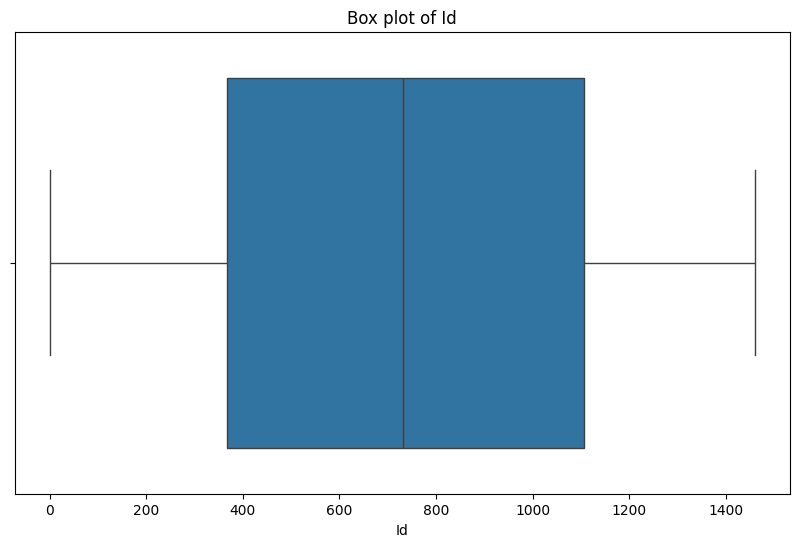

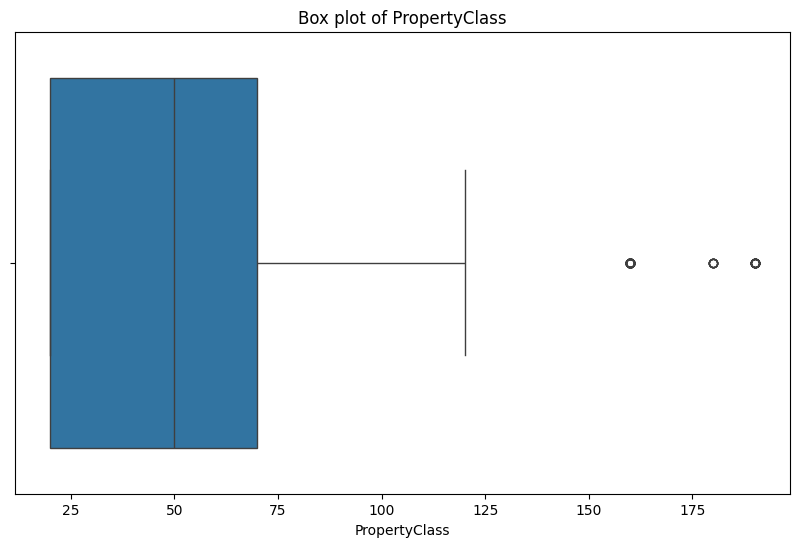

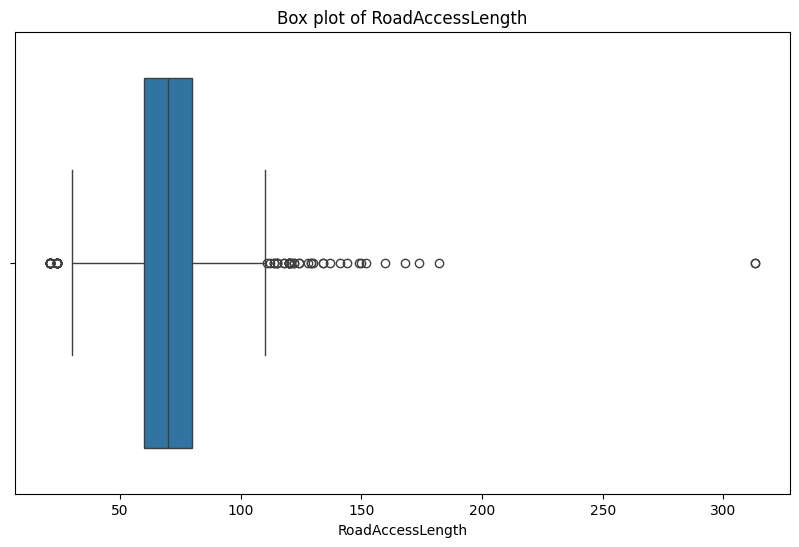

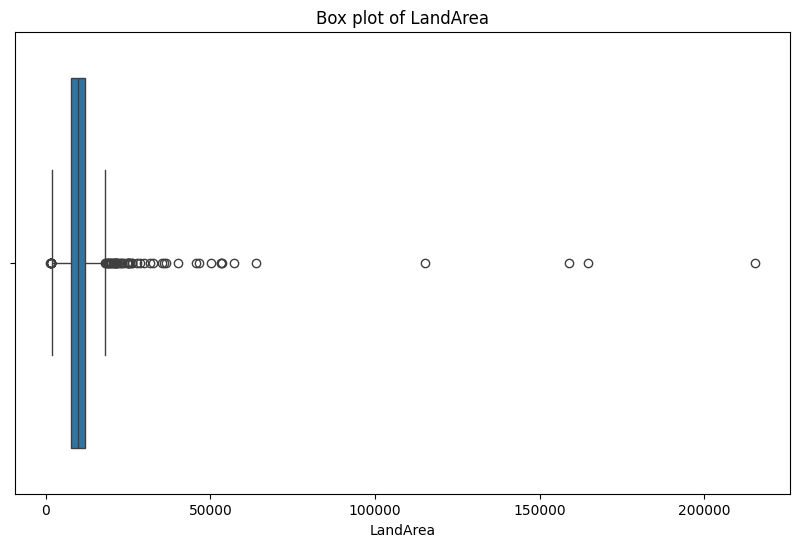

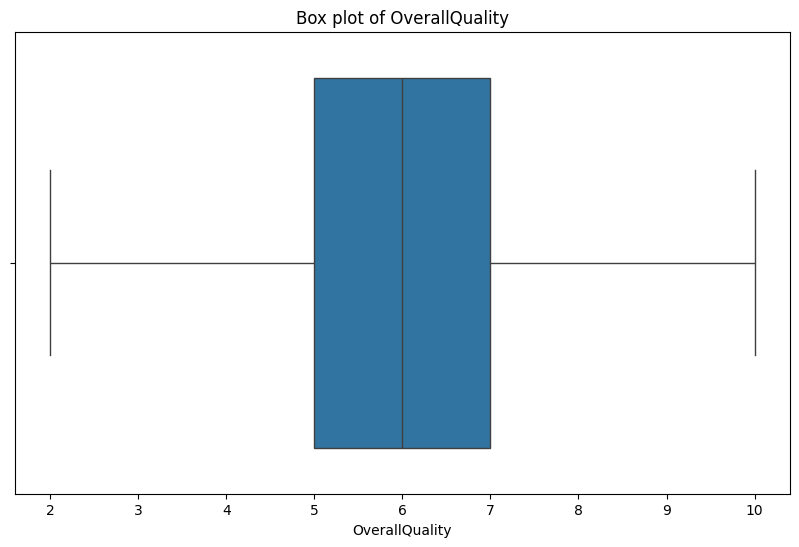

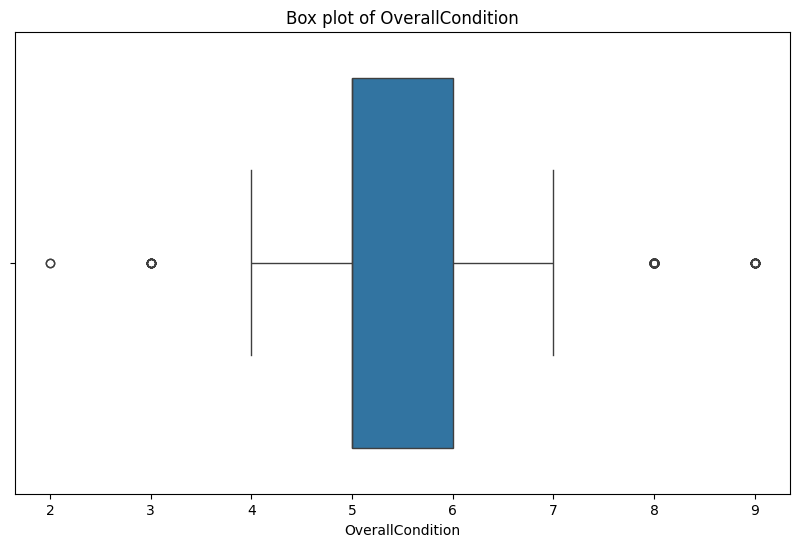

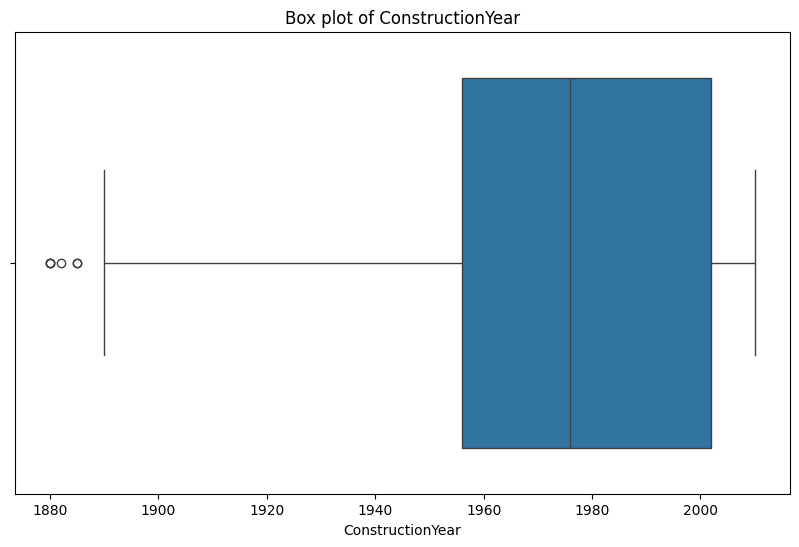

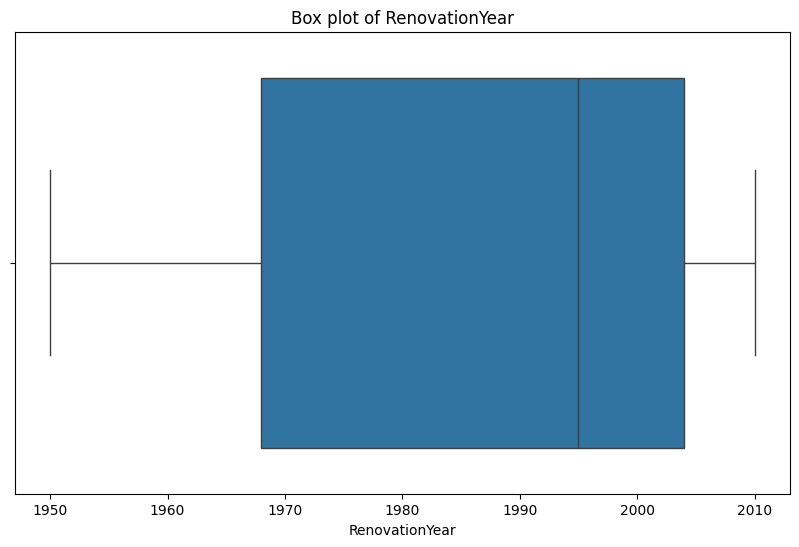

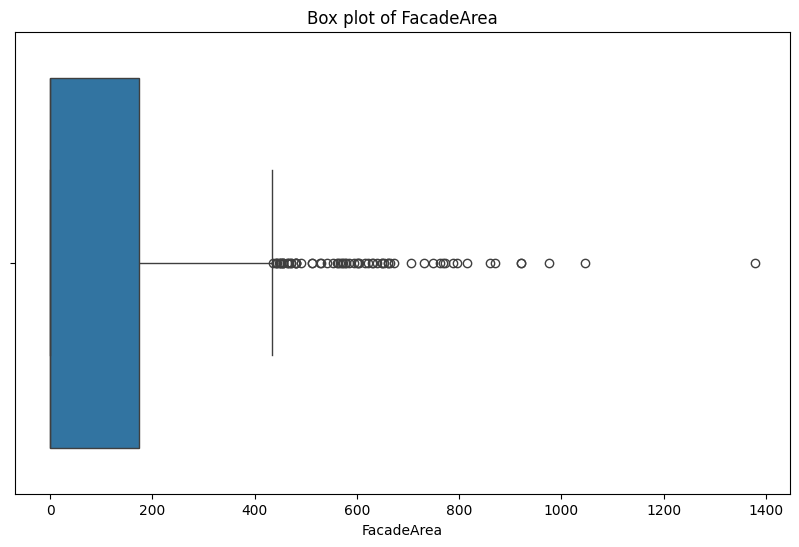

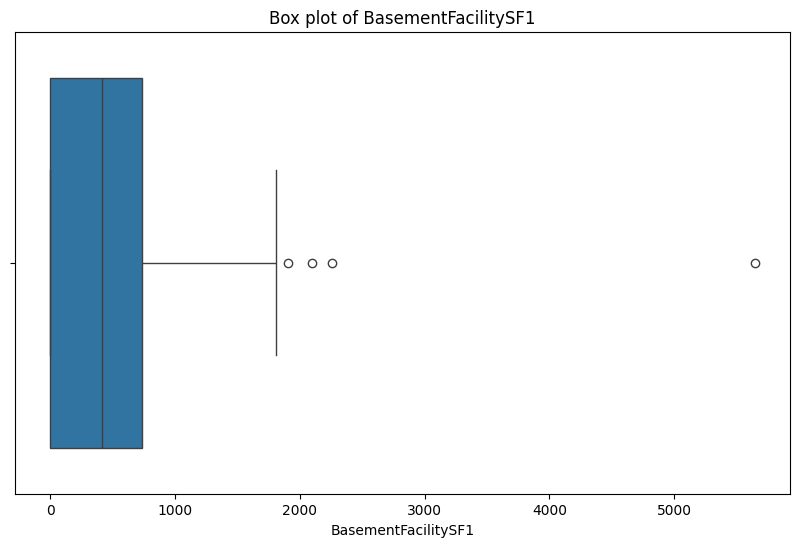

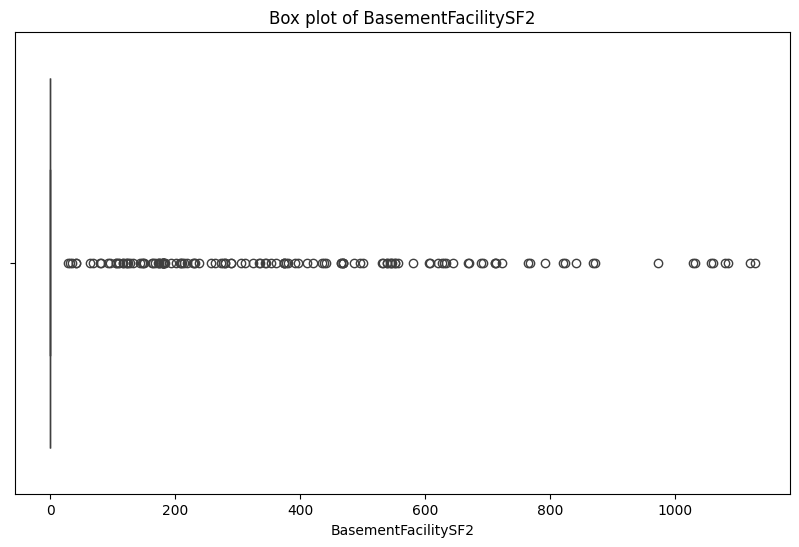

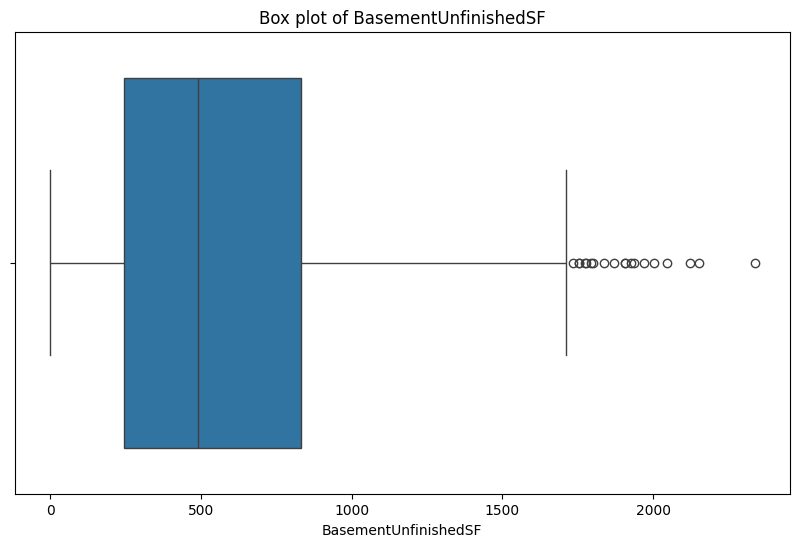

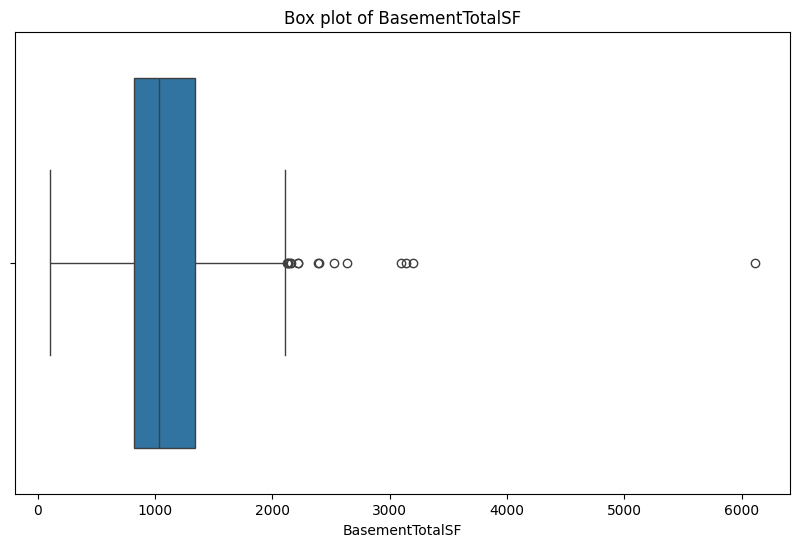

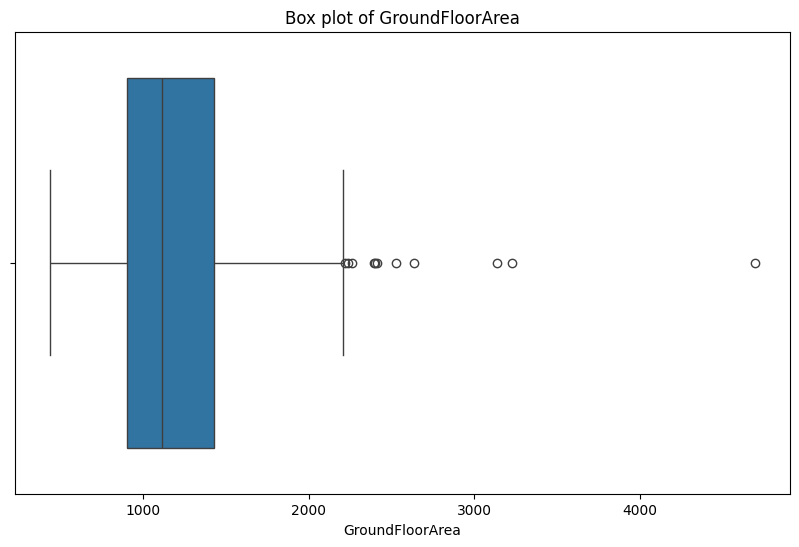

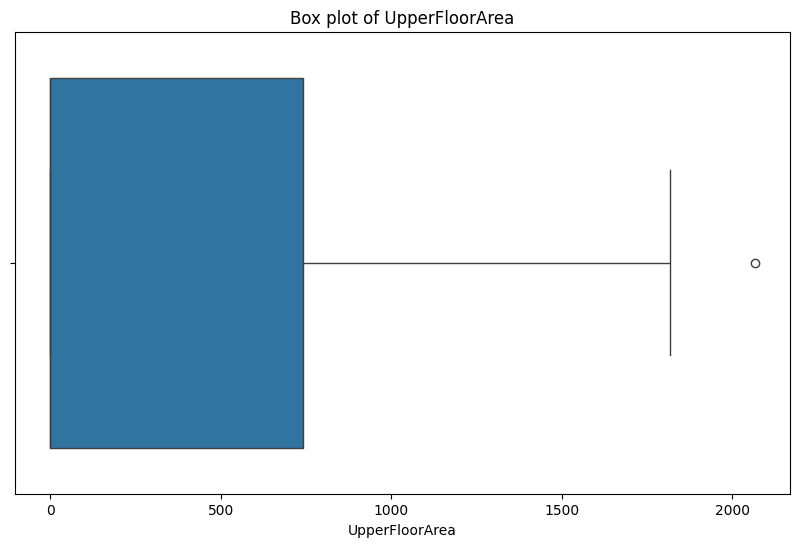

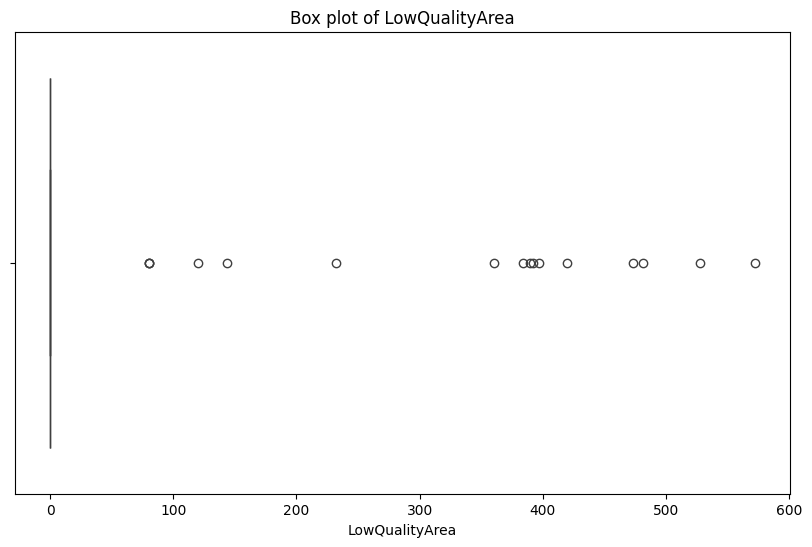

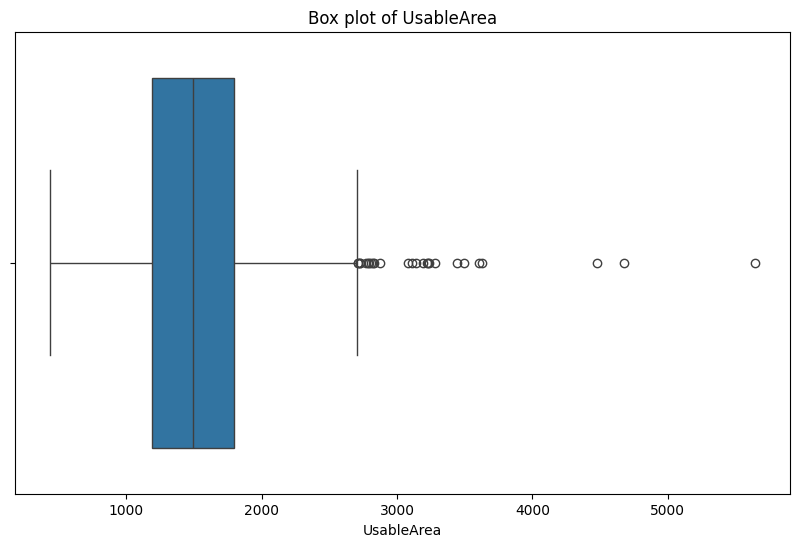

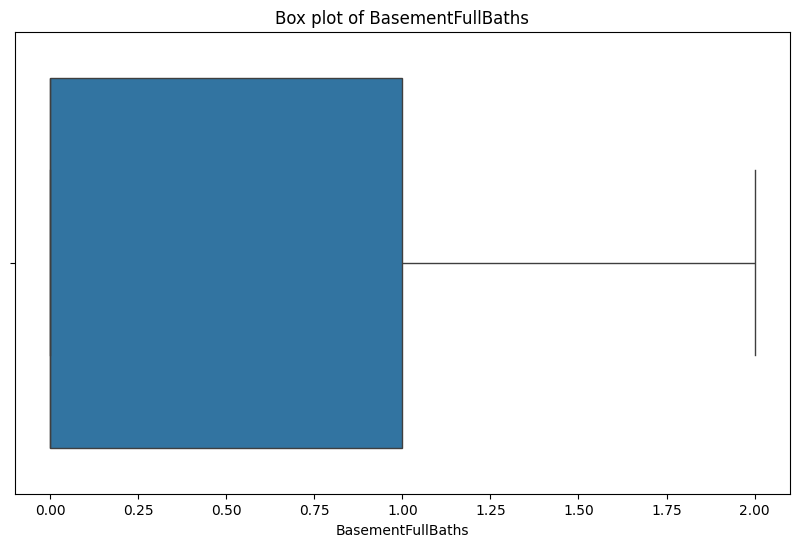

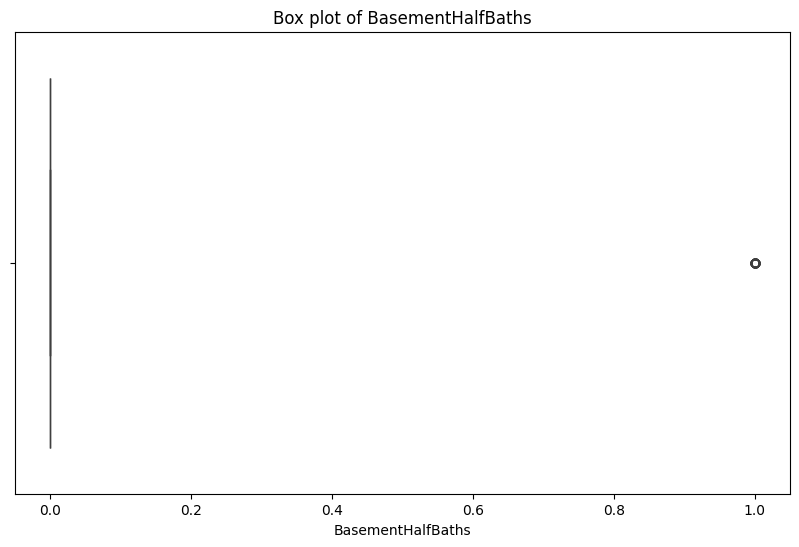

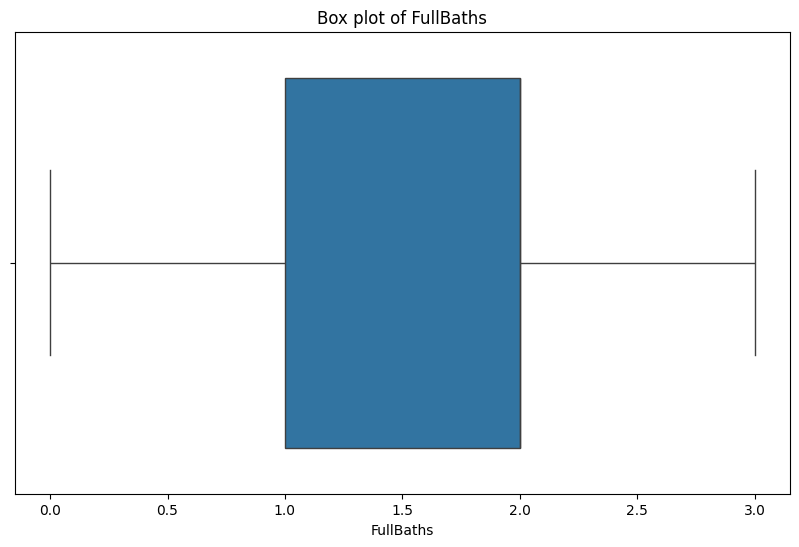

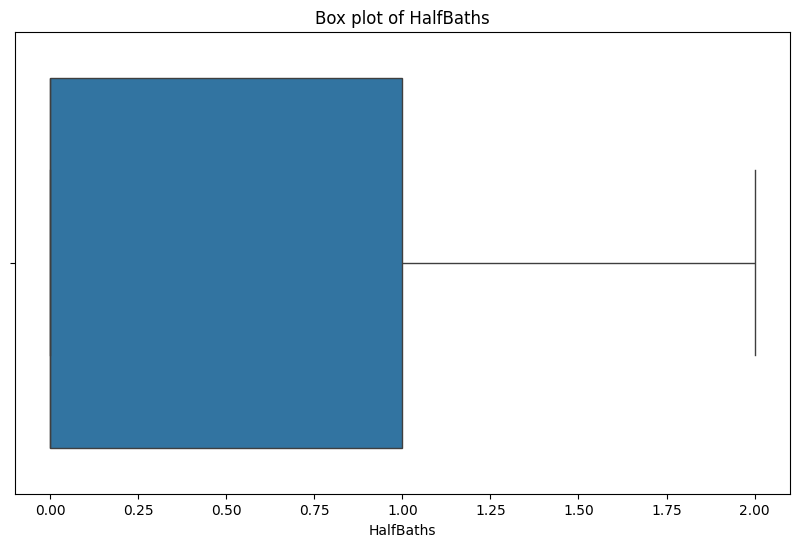

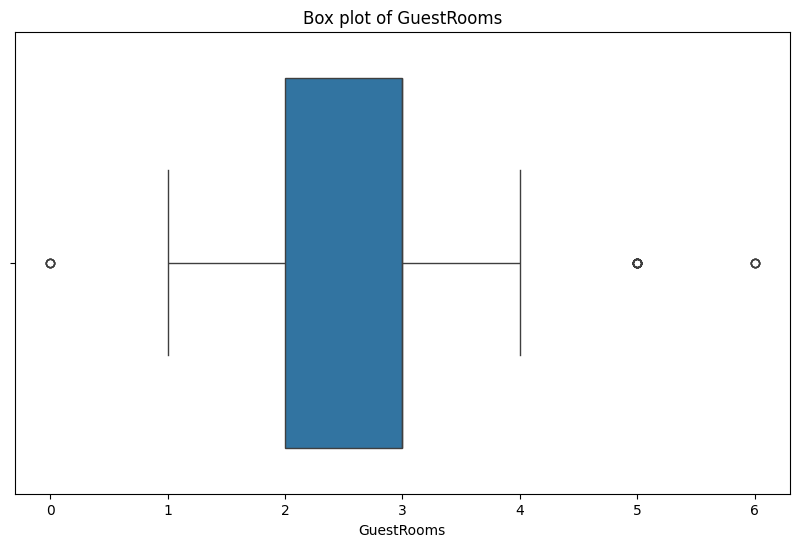

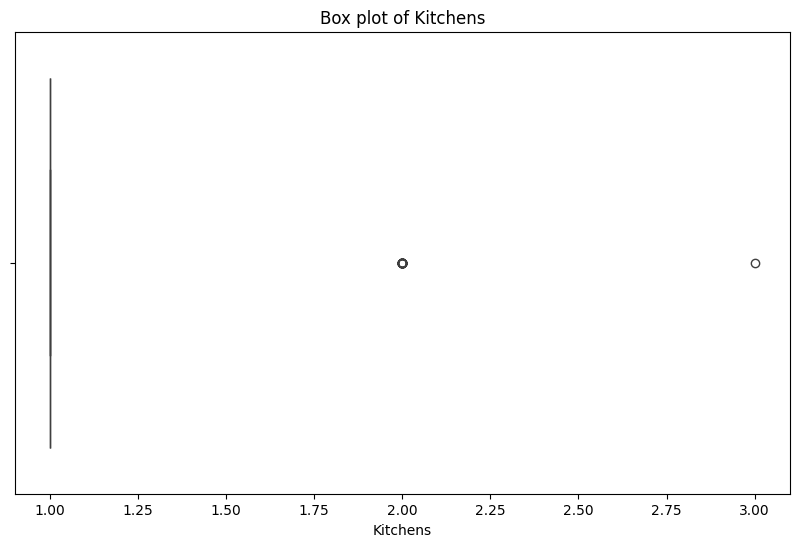

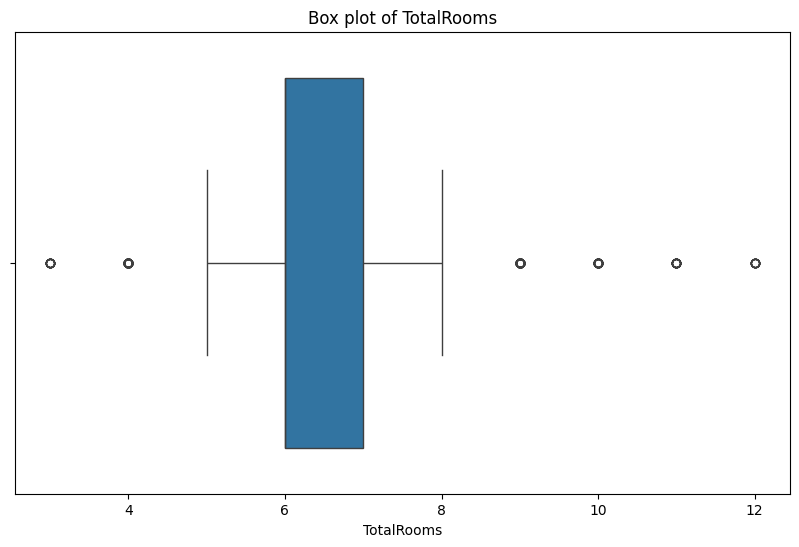

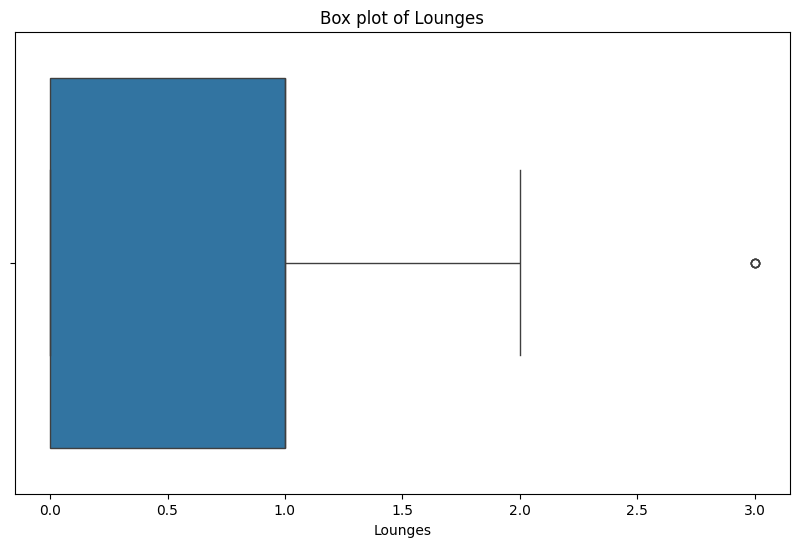

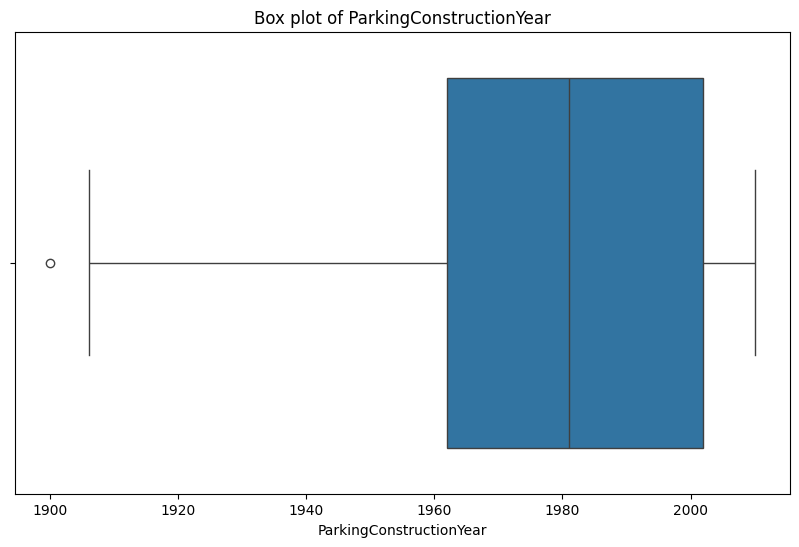

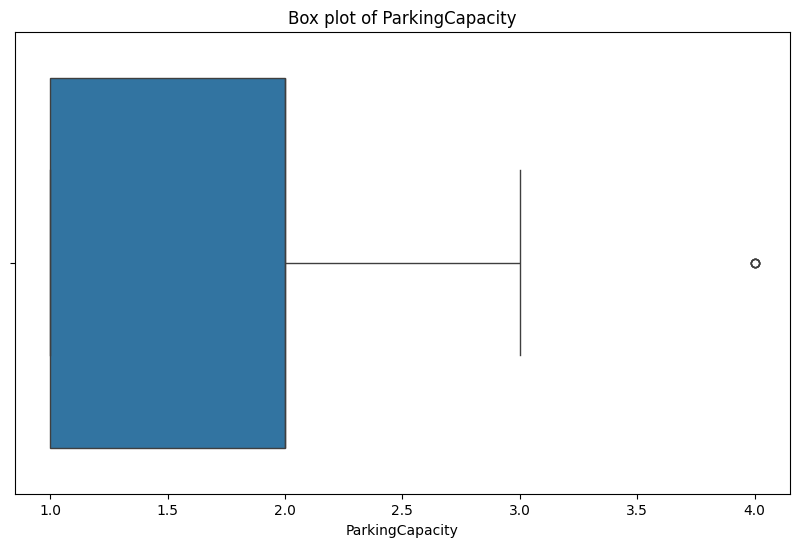

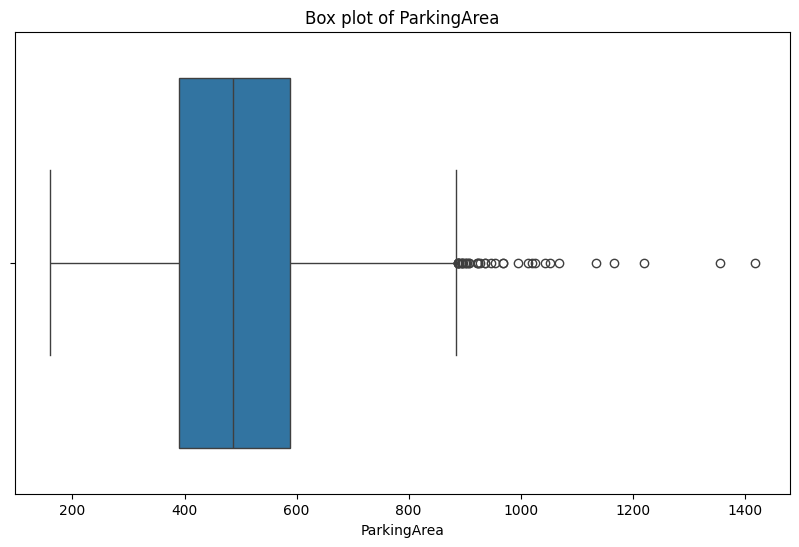

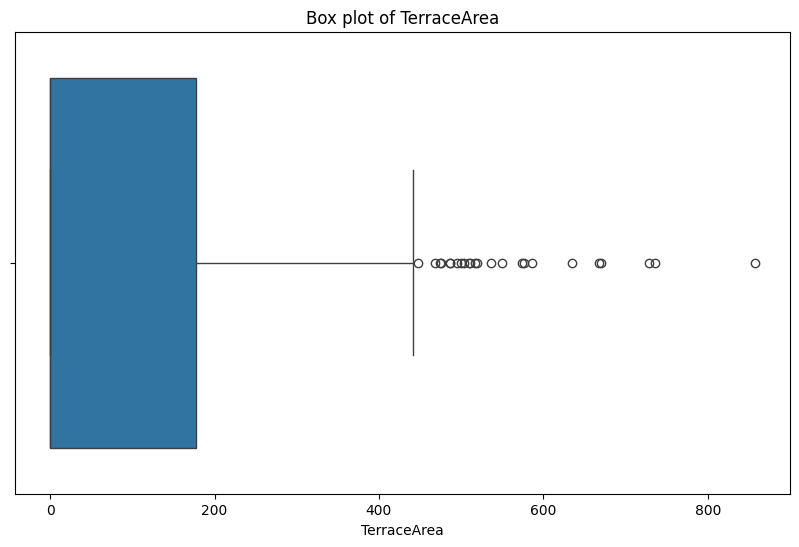

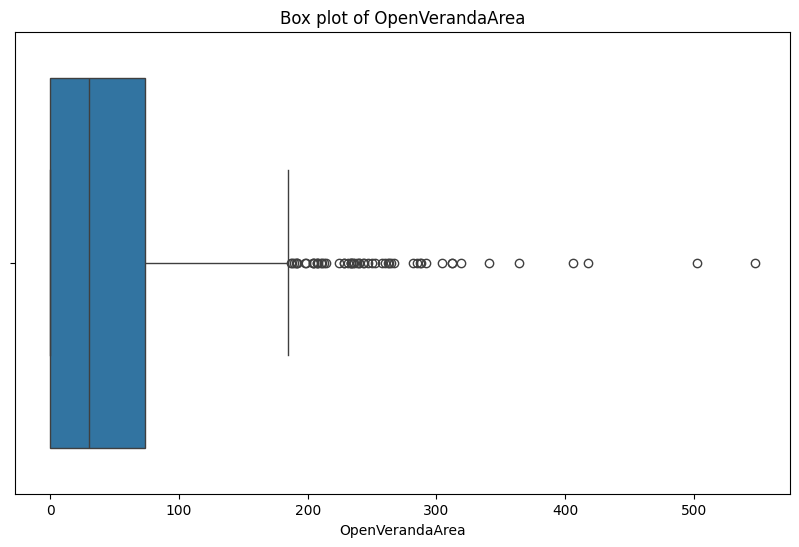

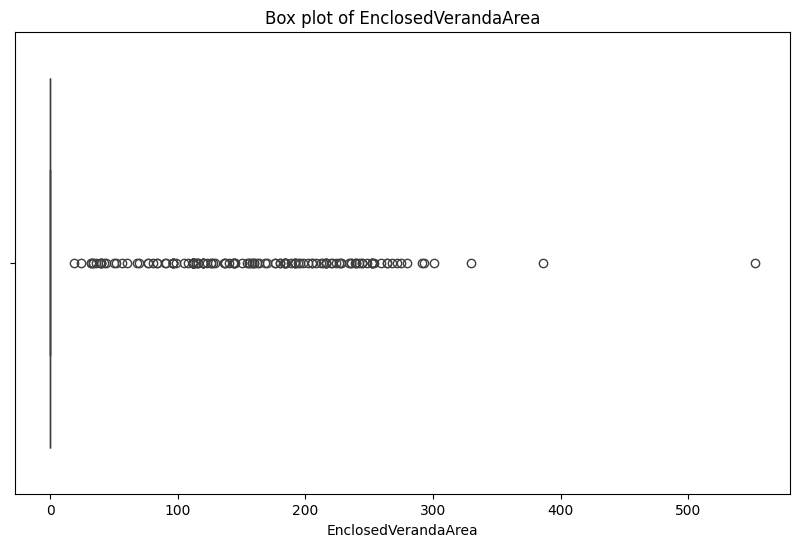

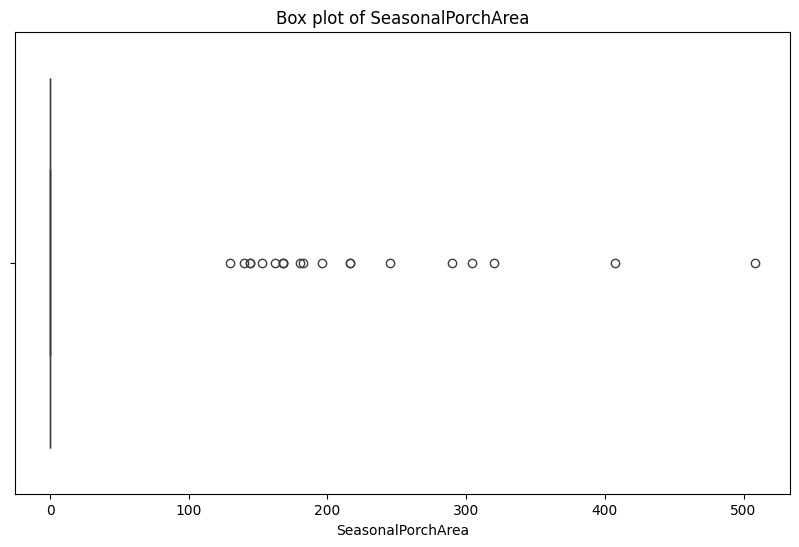

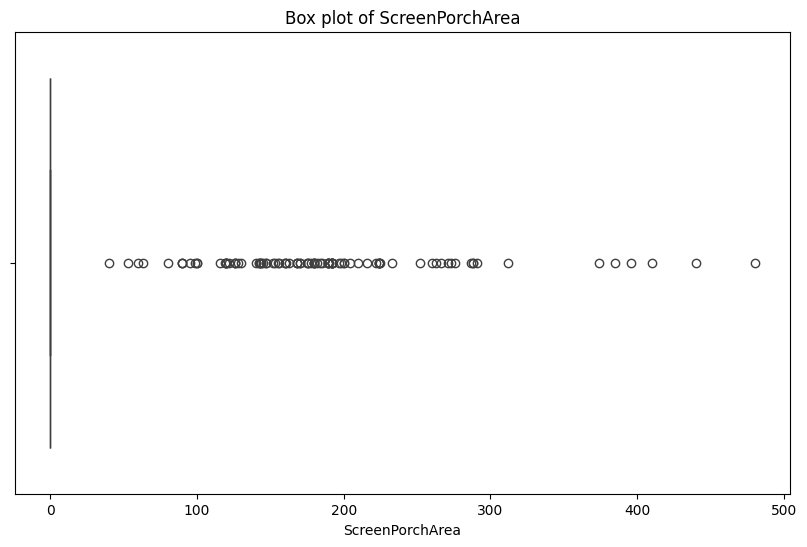

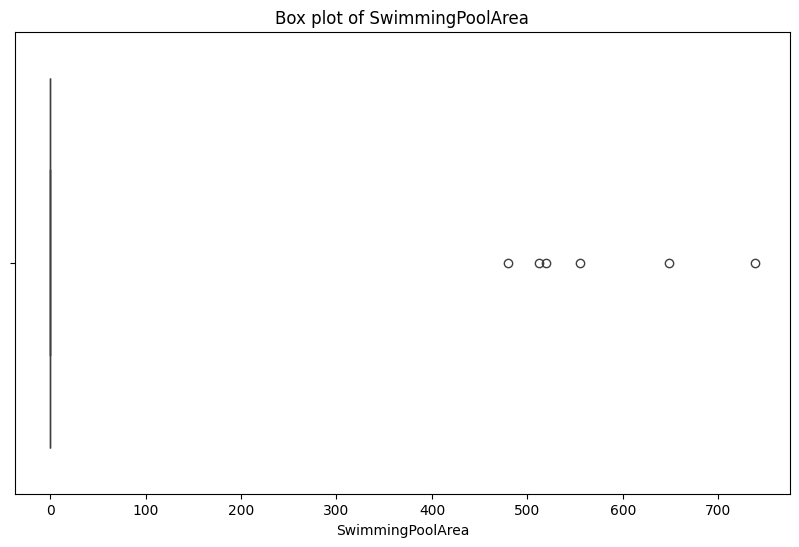

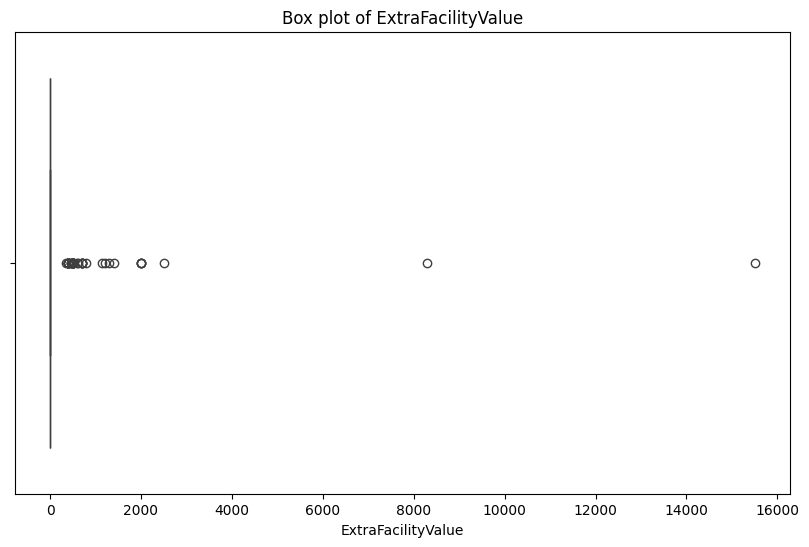

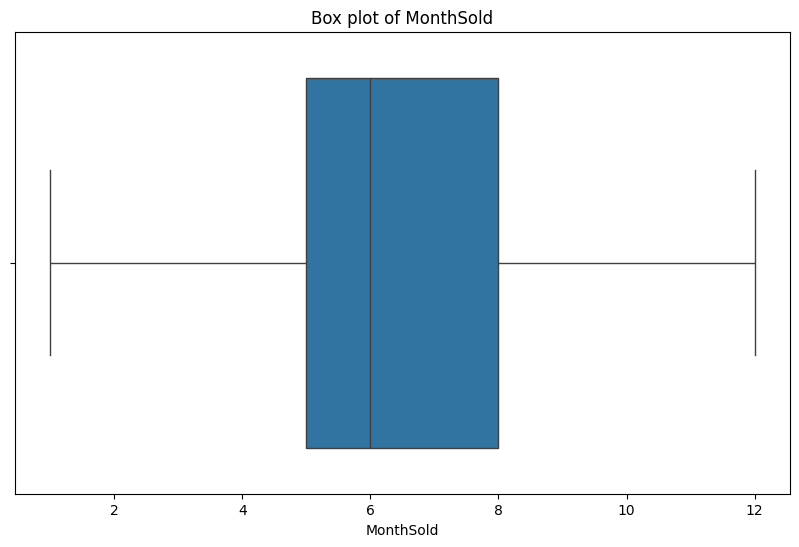

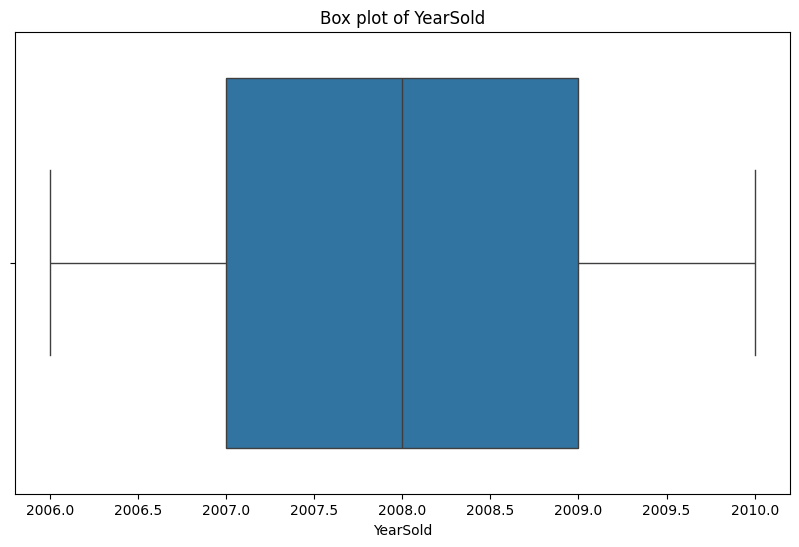

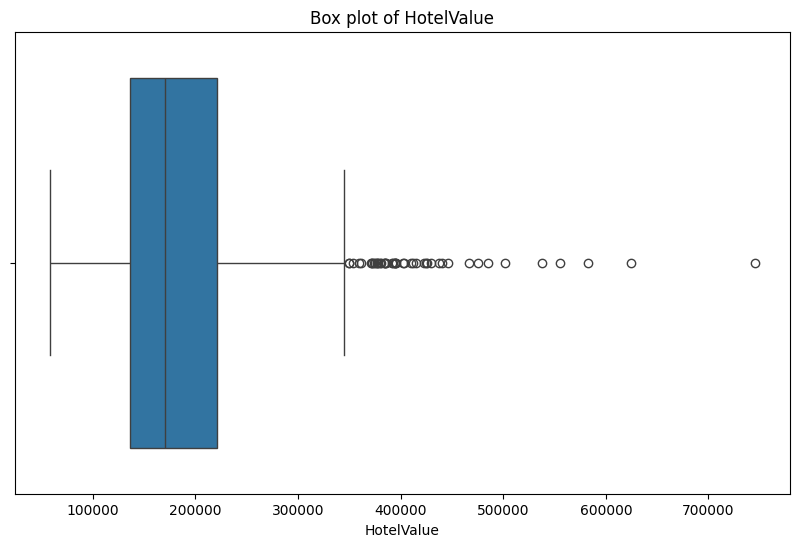

In [23]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

Calculate the IQR and bounds for each numerical column and identify outliers.

And change the outlier values to those of bounding values


In [24]:
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR



In [25]:
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not col_outliers.empty:
        outliers[col] = col_outliers
        print(f"Outliers found in column: {col}")
        display(col_outliers)
    else:
        print(f"No outliers found in column: {col}")

No outliers found in column: HotelValue


Iterate through the categorical columns and print the value counts to identify infrequent categories.



In [26]:
infrequent_categories = {}
threshold = 0.01 * df.shape[0]

for col in categorical_cols:
    value_counts = df[col].value_counts()
    infrequent = value_counts[value_counts < threshold].index.tolist()
    if infrequent:
        infrequent_categories[col] = infrequent
        print(f"Column '{col}' has infrequent categories: {infrequent}")


Column 'ZoningCategory' has infrequent categories: ['RH', 'C (all)']
Column 'RoadType' has infrequent categories: ['Grvl']
Column 'PlotShape' has infrequent categories: ['IR3']
Column 'UtilityAccess' has infrequent categories: ['NoSeWa']
Column 'PlotConfiguration' has infrequent categories: ['FR3']
Column 'LandSlope' has infrequent categories: ['Sev']
Column 'District' has infrequent categories: ['Veenker', 'MeadowV', 'NPkVill', 'Blueste']
Column 'NearbyTransport1' has infrequent categories: ['RRAe', 'PosA', 'RRNn', 'RRNe']
Column 'NearbyTransport2' has infrequent categories: ['Feedr', 'Artery', 'PosN', 'PosA', 'RRNn', 'RRAe', 'RRAn']
Column 'HotelStyle' has infrequent categories: ['1.5Unf', '2.5Unf', '2.5Fin']
Column 'RoofDesign' has infrequent categories: ['Flat', 'Gambrel', 'Mansard', 'Shed']
Column 'RoofMaterial' has infrequent categories: ['Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'ClyTile', 'Roll']
Column 'ExteriorPrimary' has infrequent categories: ['ImStucc', 'BrkComm', 'CBlock

# Scaling and Standardization

In this section, we apply two common preprocessing techniques on the numeric features of our hotel dataset:

1. **Min-Max Scaling:** Rescales all numeric columns to the range [0, 1].  
2. **Standardization (Z-score):** Centers the data around 0 with a standard deviation of 1.

We exclude the target variable `HotelValue` from scaling/standardization.


In [27]:
df.head()  # Check first 5 rows

# Scaling and Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numeric columns excluding target variable 'HotelValue'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('HotelValue')

# Min-Max Scaling
print("Applying Min-Max Scaling...")
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
print("First 5 rows after Min-Max Scaling:")
display(df_scaled[numeric_cols].head())

# Standardization (Z-score)
print("\nApplying Standardization (Z-score)...")
scaler_std = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler_std.fit_transform(df_standardized[numeric_cols])
print("First 5 rows after Standardization:")
display(df_standardized[numeric_cols].head())


Applying Min-Max Scaling...
First 5 rows after Min-Max Scaling:


,Id,PropertyClass,RoadAccessLength,LandArea,OverallQuality,OverallCondition,ConstructionYear,RenovationYear,FacadeArea,BasementFacilitySF1,...,ParkingArea,TerraceArea,OpenVerandaArea,EnclosedVerandaArea,SeasonalPorchArea,ScreenPorchArea,SwimmingPoolArea,ExtraFacilityValue,MonthSold,YearSold
0,0.530500,0.000000,0.304795,0.060417,0.750,0.428571,0.969231,0.933333,0.272134,0.000000,...,0.584261,0.367561,0.082267,0.0,0.0,0.000000,0.0,0.0,0.545455,0.25
1,0.460589,0.000000,0.202055,0.046507,0.500,0.571429,0.746154,0.450000,0.000000,0.135897,...,0.306836,0.231039,0.076782,0.0,0.0,0.000000,0.0,0.0,0.454545,0.00
2,0.159698,0.000000,0.184932,0.043703,0.375,0.571429,0.738462,0.433333,0.000000,0.032247,...,0.117647,0.425904,0.000000,0.0,0.0,0.000000,0.0,0.0,0.090909,1.00
3,0.291981,0.352941,0.167808,0.053752,0.625,0.428571,0.838462,0.650000,0.105225,0.268958,...,0.325119,0.093349,0.000000,0.0,0.0,0.825000,0.0,0.0,0.636364,0.75
4,0.134339,0.000000,0.198630,0.037935,0.625,0.428571,0.976923,0.950000,0.148766,0.199504,...,0.497615,0.199533,0.252285,0.0,0.0,0.554167,0.0,0.0,0.727273,0.25



Applying Standardization (Z-score)...
First 5 rows after Standardization:


,Id,PropertyClass,RoadAccessLength,LandArea,OverallQuality,OverallCondition,ConstructionYear,RenovationYear,FacadeArea,BasementFacilitySF1,...,ParkingArea,TerraceArea,OpenVerandaArea,EnclosedVerandaArea,SeasonalPorchArea,ScreenPorchArea,SwimmingPoolArea,ExtraFacilityValue,MonthSold,YearSold
0,0.099505,-0.870785,1.670492,0.303200,1.344406,-0.557085,1.103789,0.996703,1.508162,-1.008405,...,2.123504,1.628518,-0.075392,-0.339125,-0.124403,-0.287658,-0.073032,-0.088102,0.237783,-0.620396
1,-0.140782,-0.870785,0.395507,0.033189,-0.181004,0.373356,0.131123,-0.431121,-0.622512,0.647190,...,0.220132,0.738635,-0.119524,-0.339125,-0.124403,-0.287658,-0.073032,-0.088102,-0.135634,-1.373880
2,-1.174962,-0.870785,0.183010,-0.021249,-0.943710,0.373356,0.097583,-0.480357,-0.622512,-0.615552,...,-1.077869,2.008810,-0.737369,-0.339125,-0.124403,-0.287658,-0.073032,-0.088102,-1.629305,1.640057
3,-0.720300,0.568716,-0.029488,0.173820,0.581701,-0.557085,0.533605,0.159703,0.201349,2.268249,...,0.345570,-0.158855,-0.737369,-0.339125,-0.124403,6.430978,-0.073032,-0.088102,0.611201,0.886573
4,-1.262126,-0.870785,0.353008,-0.133209,0.581701,-0.557085,1.137329,1.045939,0.542257,1.422104,...,1.529041,0.533277,1.292693,-0.339125,-0.124403,4.225365,-0.073032,-0.088102,0.984618,-0.620396


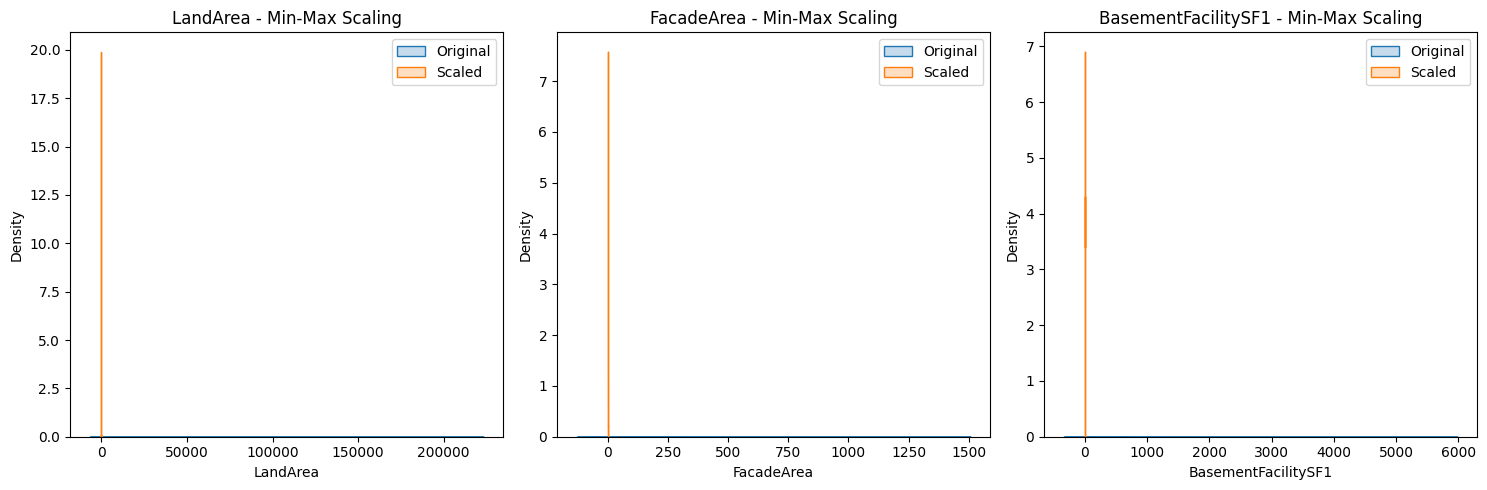

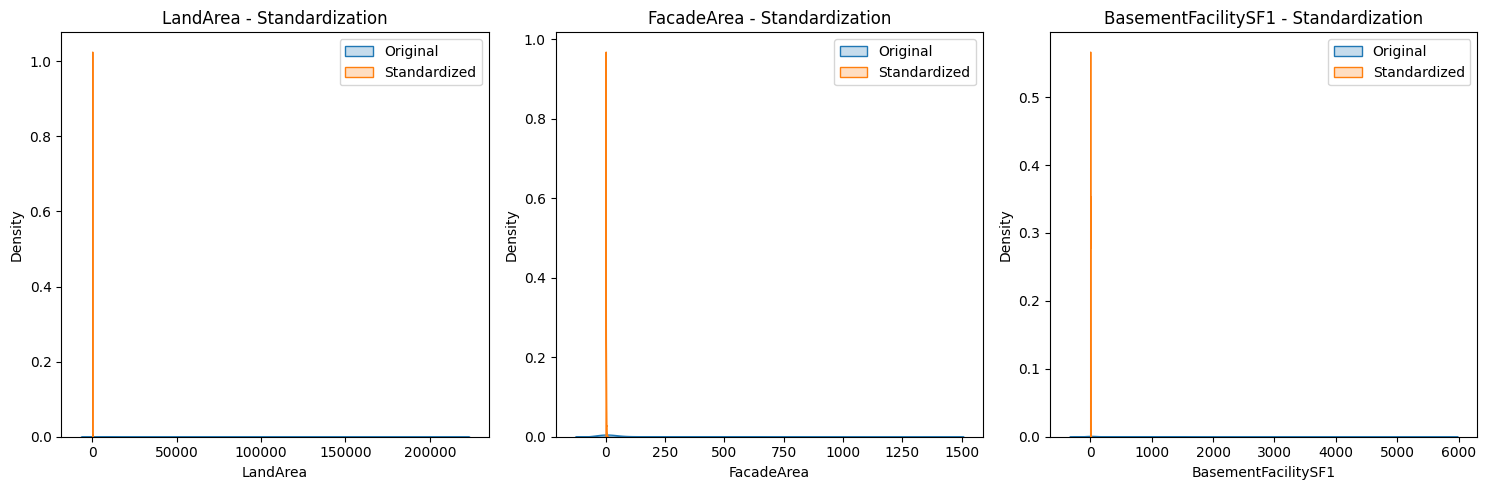

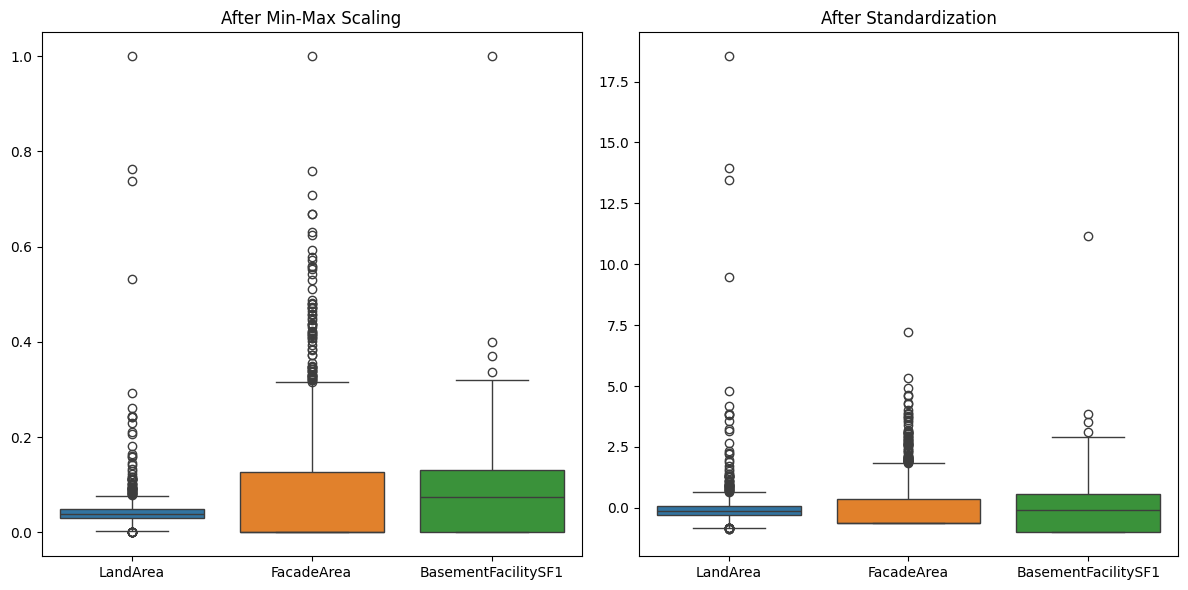

In [30]:
# Visualizing the effect of scaling & standardization

# Select a few numeric columns for visualization
cols_to_plot = ['LandArea', 'FacadeArea', 'BasementFacilitySF1']

# Min-Max scaling visualization
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), i+1)
    sns.kdeplot(df[col], label='Original', shade=True)
    sns.kdeplot(df_scaled[col], label='Scaled', shade=True)
    plt.title(f'{col} - Min-Max Scaling')
    plt.legend()
plt.tight_layout()
plt.show()

# Standardization visualization
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), i+1)
    sns.kdeplot(df[col], label='Original', shade=True)
    sns.kdeplot(df_standardized[col], label='Standardized', shade=True)
    plt.title(f'{col} - Standardization')
    plt.legend()
plt.tight_layout()
plt.show()

# Boxplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_scaled[cols_to_plot], ax=axes[0])
axes[0].set_title('After Min-Max Scaling')

sns.boxplot(data=df_standardized[cols_to_plot], ax=axes[1])
axes[1].set_title('After Standardization')

plt.tight_layout()
plt.show()


In [ ]:
# Save the preprocessed file
df.to_csv("hotel_data_preprocessed.csv", index=False)
files.download("hotel_data_preprocessed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

We will explore the target (`HotelValue`) and the main features to understand distributions, correlations, non-linearity, multicollinearity and categorical effects.  
Run these cells in order. Visualizations are done **before** final scaling/standardization so they show original magnitudes.


## 1) Target variable: check distribution & log-transform

We check the distribution of `HotelValue`. Real-estate prices are often right-skewed; applying `log1p` often makes the target closer to normal, which helps linear regression and related models.


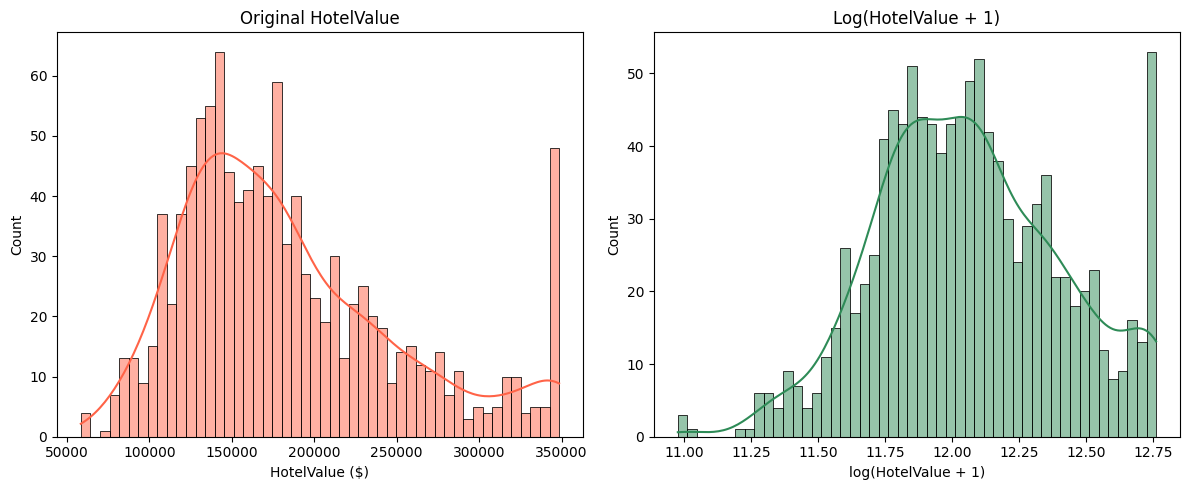

Skewness -> Original: 0.8821747836254473     Log: 0.1090965506077775


In [31]:
# Create log target column (non-destructive)
if 'HotelValue' not in df.columns:
    raise KeyError("Column 'HotelValue' not found in df. Check column names.")
df['Log_HotelValue'] = np.log1p(df['HotelValue'])

# Plot original vs log-transformed target
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['HotelValue'], kde=True, bins=50, color='tomato')
plt.title('Original HotelValue')
plt.xlabel('HotelValue ($)')

plt.subplot(1,2,2)
sns.histplot(df['Log_HotelValue'], kde=True, bins=50, color='seagreen')
plt.title('Log(HotelValue + 1)')
plt.xlabel('log(HotelValue + 1)')

plt.tight_layout()
plt.show()

# Numeric skewness values
print("Skewness -> Original:", df['HotelValue'].skew(), "    Log:", df['Log_HotelValue'].skew())


## 2) Prepare numeric features list

We will build `final_features` automatically: all numeric columns excluding `Id`, `HotelValue`, and `Log_HotelValue`. These are the columns used for correlation analysis and PCA checks.


In [32]:
# Build feature list of numeric columns excluding id and target
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
exclude = {'Id','HotelValue','Log_HotelValue'}
final_features = [c for c in numeric_cols if c not in exclude]
print("Number of numeric features considered:", len(final_features))
# preview
final_features[:50]


Number of numeric features considered: 36


['PropertyClass',
 'RoadAccessLength',
 'LandArea',
 'OverallQuality',
 'OverallCondition',
 'ConstructionYear',
 'RenovationYear',
 'FacadeArea',
 'BasementFacilitySF1',
 'BasementFacilitySF2',
 'BasementUnfinishedSF',
 'BasementTotalSF',
 'GroundFloorArea',
 'UpperFloorArea',
 'LowQualityArea',
 'UsableArea',
 'BasementFullBaths',
 'BasementHalfBaths',
 'FullBaths',
 'HalfBaths',
 'GuestRooms',
 'Kitchens',
 'TotalRooms',
 'Lounges',
 'ParkingConstructionYear',
 'ParkingCapacity',
 'ParkingArea',
 'TerraceArea',
 'OpenVerandaArea',
 'EnclosedVerandaArea',
 'SeasonalPorchArea',
 'ScreenPorchArea',
 'SwimmingPoolArea',
 'ExtraFacilityValue',
 'MonthSold',
 'YearSold']

## 3) Top features correlated with target

Compute correlation of each numeric feature with `Log_HotelValue`. We rank features by absolute correlation and plot the top 20. This tells us which features are most predictive and helps decide on features for linear/polynomial models.


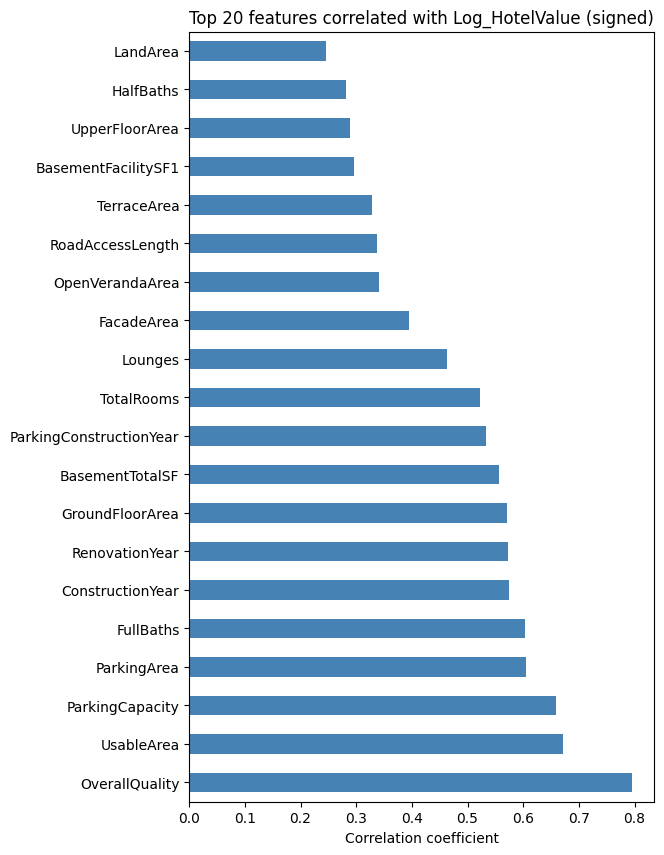

Top features by absolute correlation:
OverallQuality             0.795567
UsableArea                 0.672313
ParkingCapacity            0.658542
ParkingArea                0.604308
FullBaths                  0.602923
ConstructionYear           0.573565
RenovationYear             0.573405
GroundFloorArea            0.570736
BasementTotalSF            0.555739
ParkingConstructionYear    0.533689
Name: Log_HotelValue, dtype: float64


In [33]:
# Correlation with target
corr_with_target = df[final_features + ['Log_HotelValue']].corr()['Log_HotelValue'].drop('Log_HotelValue')
# sort by absolute value but display signed values
corr_sorted = corr_with_target.reindex(corr_with_target.abs().sort_values(ascending=False).index)

# Plot top 20 (signed)
top_n = 20
top20 = corr_sorted.head(top_n)
plt.figure(figsize=(6,10))
top20.sort_values().plot(kind='barh', color='steelblue')
plt.title(f'Top {top_n} features correlated with Log_HotelValue (signed)')
plt.xlabel('Correlation coefficient')
plt.gca().invert_yaxis()
plt.show()

# Print numeric list of top features
print("Top features by absolute correlation:")
print(corr_with_target.abs().sort_values(ascending=False).head(10))


## 4) Linearity / Non-linearity check for a top feature

Pick one top correlated feature and plot scatter + smoothed trend vs `Log_HotelValue`. If the relationship looks curved, polynomial terms may help; if noisy/nonlinear, tree models may be better.


Using feature for scatter: OverallQuality


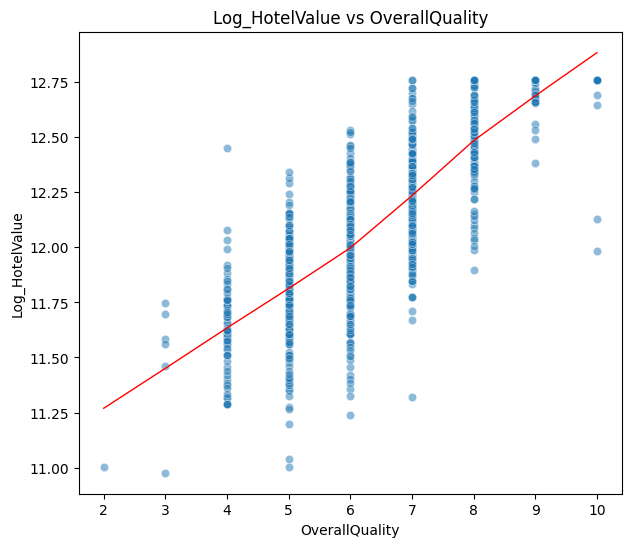

In [34]:
# pick a top feature automatically
if len(corr_sorted) == 0:
    raise ValueError("No numeric features found in final_features.")
feature = corr_sorted.index[0]  # most strongly correlated feature
print("Using feature for scatter:", feature)

plt.figure(figsize=(7,6))
sns.scatterplot(x=df[feature], y=df['Log_HotelValue'], alpha=0.5)
# add smoothed trendline
sns.regplot(x=df[feature], y=df['Log_HotelValue'], scatter=False, lowess=True, color='red', line_kws={'lw':1})
plt.xlabel(feature)
plt.ylabel('Log_HotelValue')
plt.title(f'Log_HotelValue vs {feature}')
plt.show()


## 5) Multicollinearity check among top features

If top features are strongly correlated with each other (e.g., > 0.7), PCA or dropping redundant features is useful before linear models. We visualize a heatmap of correlations among the top 10 features.


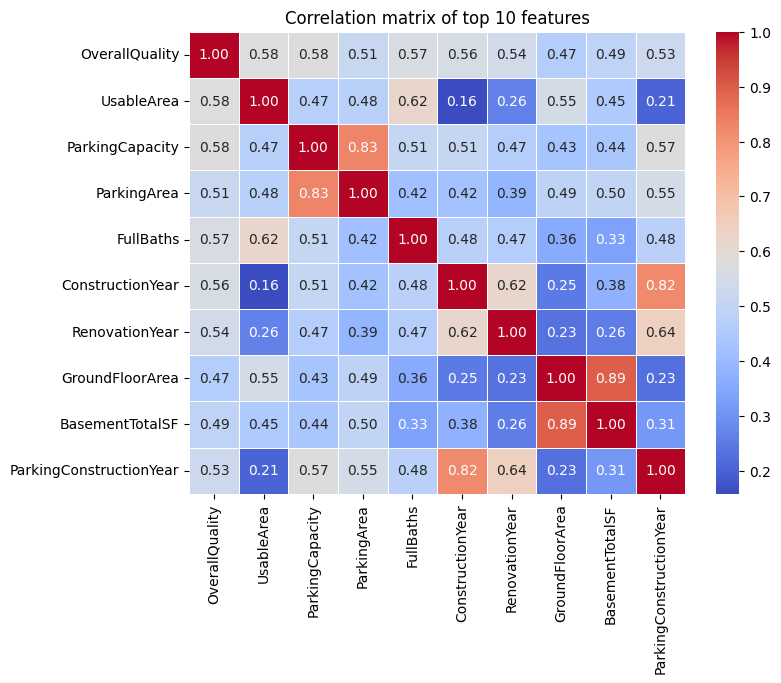

In [35]:
# top 10 features by absolute correlation
top10 = corr_with_target.abs().sort_values(ascending=False).head(10).index.tolist()
plt.figure(figsize=(8,6))
sns.heatmap(df[top10].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix of top 10 features')
plt.show()


## 6) Outlier check (boxplot)

We inspect one key numeric feature (e.g., `LandArea`) on the original scale to see if extreme values exist and whether they are valid. Outliers may justify using tree-based models or robust losses.


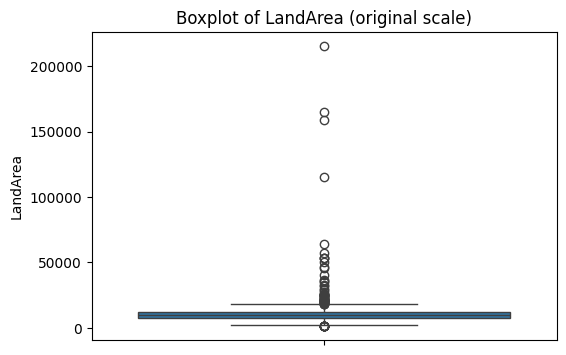

,LandArea
count,1104.000000
mean,10884.199275
std,11026.766919
min,1300.000000
25%,7798.750000
50%,9644.000000
75%,11844.500000
max,215245.000000


In [36]:
feature_for_outlier = 'LandArea' if 'LandArea' in df.columns else (final_features[0] if final_features else None)
if feature_for_outlier:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[feature_for_outlier])
    plt.title(f'Boxplot of {feature_for_outlier} (original scale)')
    plt.show()
    display(df[feature_for_outlier].describe())
else:
    print("No appropriate feature found for outlier boxplot.")


## 7) Categorical features — counts and relationship to target

We examine some categorical columns (if present) to see group sizes and how `HotelValue` varies across categories. This helps decide how to encode and whether to use target encoding vs one-hot.


Categorical columns found: ['PropertyClass', 'PropertyType', 'District', 'DealType', 'ParkingType', 'HotelStyle']


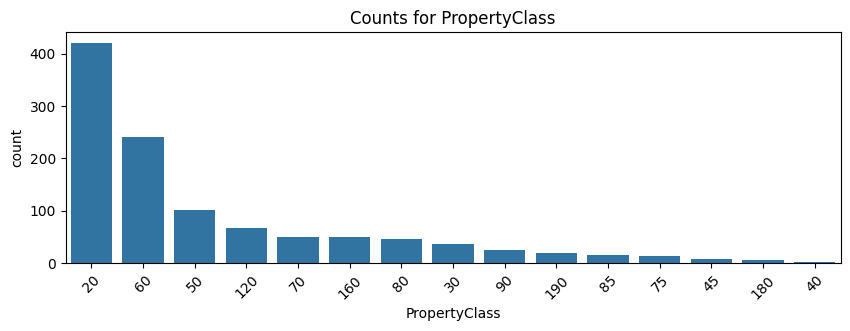

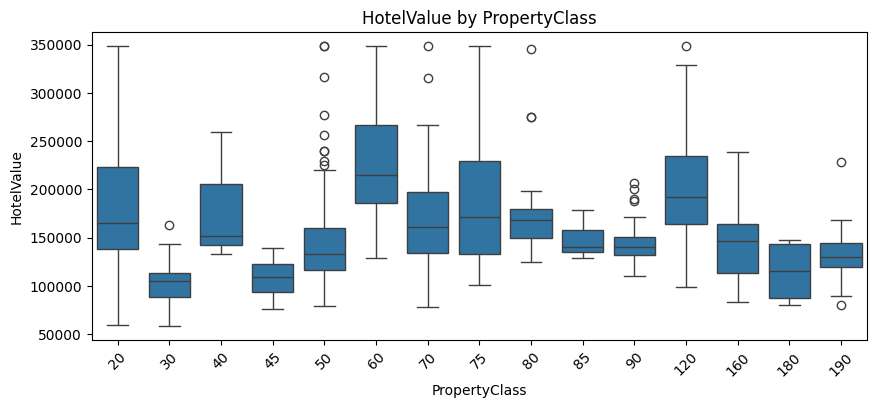

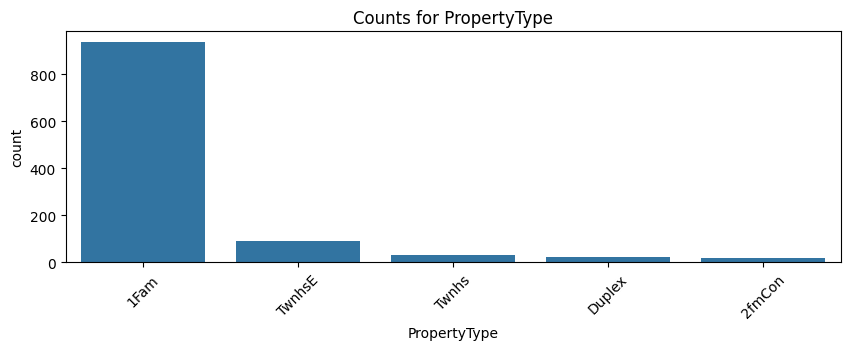

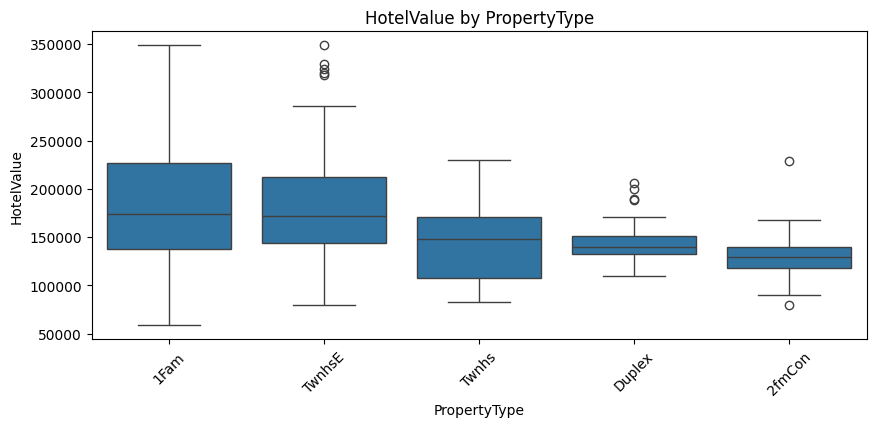

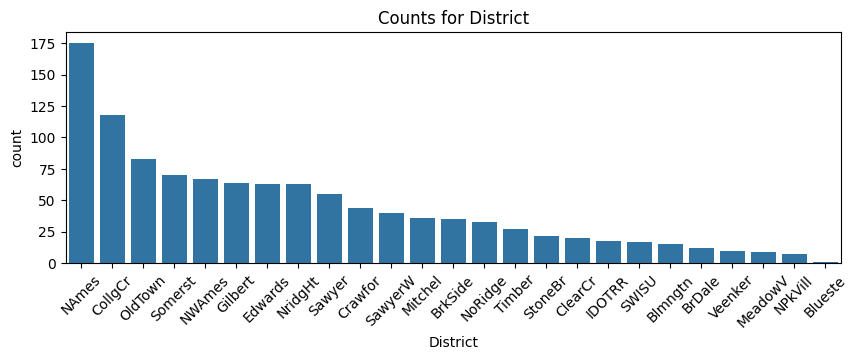

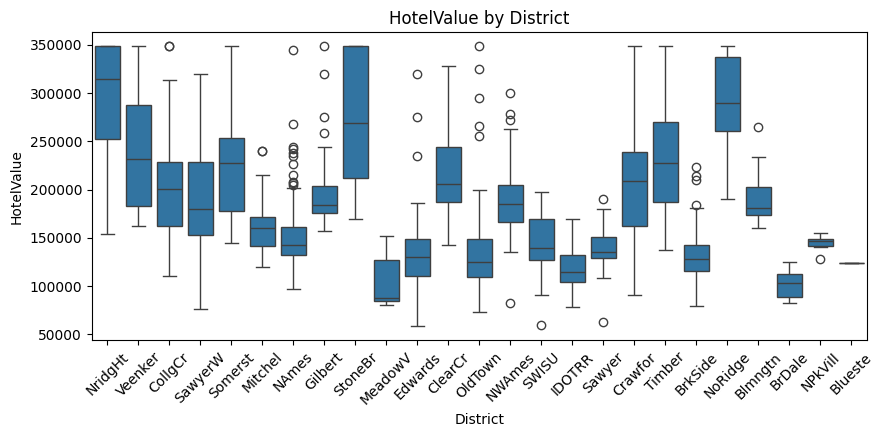

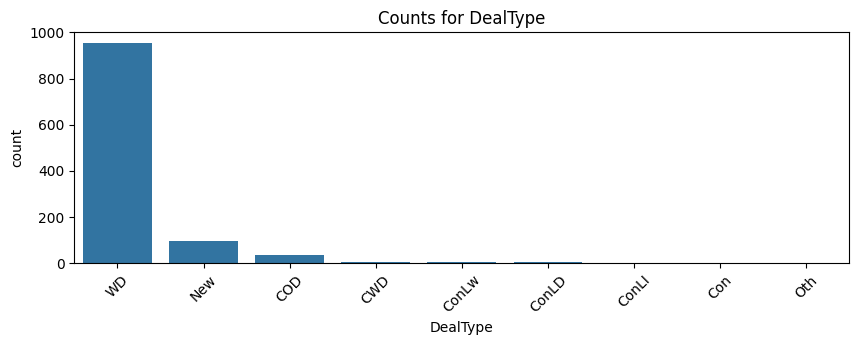

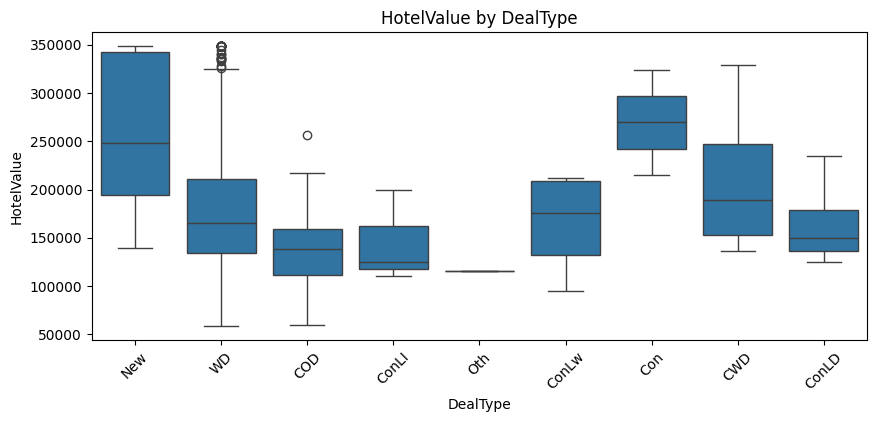

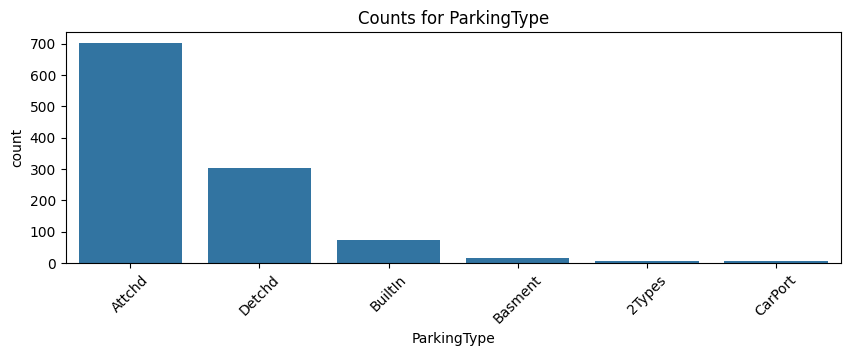

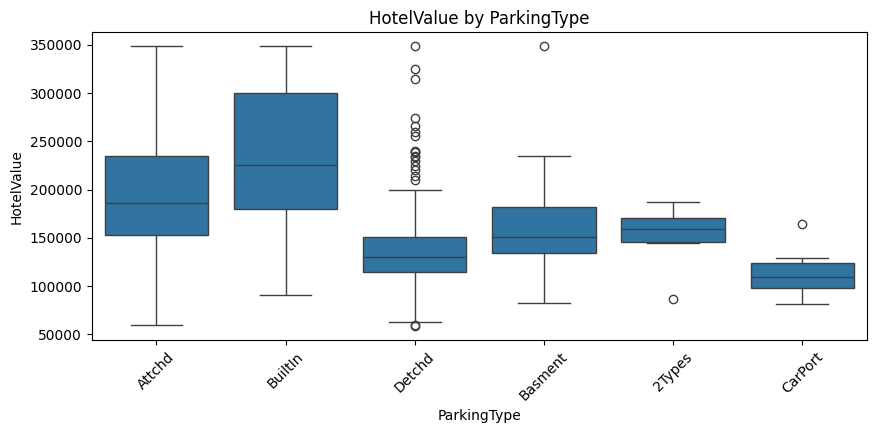

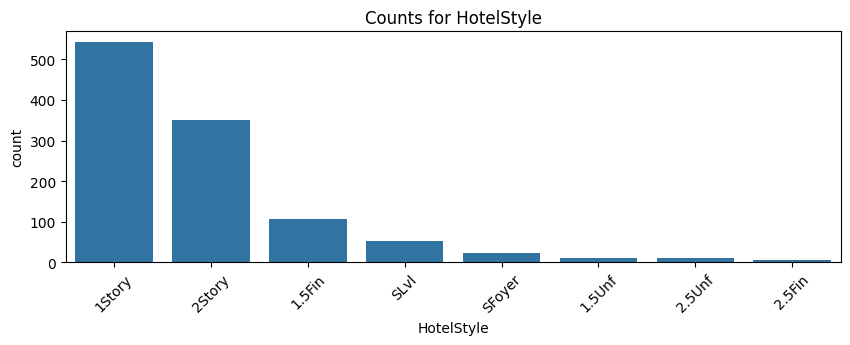

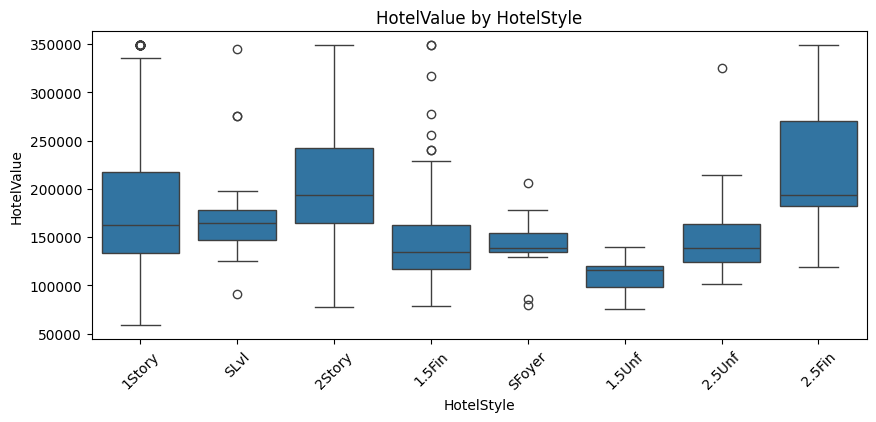

In [37]:
# Candidate categorical columns to check (from dataset description)
candidate_cat_cols = ['PropertyClass','PropertyType','District','DealType','ParkingType','PoolQuality','HotelStyle']
cat_cols = [c for c in candidate_cat_cols if c in df.columns]

print("Categorical columns found:", cat_cols)

for col in cat_cols:
    plt.figure(figsize=(10,3))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Counts for {col}')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col], y=df['HotelValue'])
    plt.title(f'HotelValue by {col}')
    plt.xticks(rotation=45)
    plt.show()


## 8) Save EDA outputs

Save correlation with target and the top feature list for use in the report.


In [ ]:
corr_with_target.to_csv('feature_target_correlation.csv')
pd.DataFrame({'top20': corr_sorted.head(20).index}).to_csv('top20_features.csv', index=False)
print("Saved: feature_target_correlation.csv , top20_features.csv")


Saved: feature_target_correlation.csv , top20_features.csv
